# Базовая работа с PyTorch

In [1]:
import torch
torch.__version__

'2.5.1+cu124'

In [10]:
p = print

In [13]:
scalar = torch.tensor(7)
p(scalar)
p('dimensions:', scalar.ndim)
p(scalar.item())

tensor(7)
dimensions: 0
7


In [14]:
vector = torch.tensor([7, 7])
p(vector)
p('dimensions:', vector.ndim)
p('shape:', vector.shape)

tensor([7, 7])
dimensions: 1
shape: torch.Size([2])


**Note:** You might've noticed me using lowercase letters for scalar and vector and uppercase letters for MATRIX and TENSOR. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as y or a. And matrices and tensors denoted as uppercase letters such as X or W.

In [18]:
MATRIX = torch.tensor([[7, 8],
                      [9, 10]])
p(MATRIX)
p('dimensions:', MATRIX.ndim)
p('shape:', MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
dimensions: 2
shape: torch.Size([2, 2])


In [19]:
TENSOR = torch.tensor([[[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]]])
p(TENSOR)
p('dimensions:', TENSOR.ndim)
p('shape:', TENSOR.shape)

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
dimensions: 3
shape: torch.Size([1, 3, 3])


In [22]:
random_tensor = torch.rand(size=(3, 4))
p(random_tensor, random_tensor.dtype)

tensor([[0.6037, 0.3545, 0.1019, 0.0433],
        [0.1052, 0.4101, 0.1472, 0.9447],
        [0.1798, 0.0298, 0.4222, 0.9154]]) torch.float32


In [24]:
random_image_size_tensor = torch.rand(size=(224, 224, 3))
p(random_image_size_tensor.shape, random_image_size_tensor.dtype)

torch.Size([224, 224, 3]) torch.float32


In [25]:
zeros = torch.zeros((3, 4))
p(zeros, zeros.dtype)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) torch.float32


In [26]:
ones = torch.ones((3, 4))
p(ones, ones.dtype)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) torch.float32


In [27]:
zero_to_ten = torch.arange(0, 10)
p(zero_to_ten)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [28]:
# torch.zeros_like(input) or torch.ones_like(input)
ten_zeros = torch.zeros_like(zero_to_ten)
p(ten_zeros)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [29]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, # defaults to None, which uses the default tensor type
                               requires_grad=False) # if True, operations performed on the tensor are recorded

p(float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device)

torch.Size([3]) torch.float32 cpu


In [30]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16)
p(float_16_tensor.dtype)

torch.float16


In [31]:
some_tensor = torch.rand(3, 4)

p(some_tensor)
p(f"Shape of tensor: {some_tensor.shape}")
p(f"Datatype of tensor: {some_tensor.dtype}")
p(f"Device tensor is stored on: {some_tensor.device}")

tensor([[0.6485, 0.1929, 0.5576, 0.1540],
        [0.7921, 0.0881, 0.6313, 0.5816],
        [0.9607, 0.0822, 0.6378, 0.6459]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Операции над Тензорами

In [35]:
tensor = torch.tensor([1, 2, 3])

p(tensor + 10)
p(tensor - 10)
p(tensor * 10)
p(tensor / 10)

p(torch.add(tensor, 10)) # +
p(torch.mul(tensor, 10)) # *

tensor([11, 12, 13])
tensor([-9, -8, -7])
tensor([10, 20, 30])
tensor([0.1000, 0.2000, 0.3000])
tensor([11, 12, 13])
tensor([10, 20, 30])


In [37]:
p(tensor * tensor) # поэлементное произведение

# скалярное при глубине 1 (векторов)
# матричное при глубине больше 1 (матриц, тензоров)
p(tensor @ tensor)
p(torch.matmul(tensor, tensor))

tensor([1, 4, 9])
tensor(14)
tensor(14)


In [38]:
%%time

value = 0

for i in range(len(tensor)):
  value += tensor[i] * tensor[i]

p(value)

tensor(14)
CPU times: user 1.67 ms, sys: 957 µs, total: 2.62 ms
Wall time: 2.64 ms


In [40]:
%%time

p(torch.matmul(tensor, tensor))

tensor(14)
CPU times: user 472 µs, sys: 24 µs, total: 496 µs
Wall time: 504 µs


In [41]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype=torch.float32)
# матрица (3, 2) @ (3, 2) ошибка
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [46]:
p(torch.transpose(tensor_A, 0, 1)) # поменять местами (3(0), 2(1))
p(tensor_A.T)

tensor([[1., 3., 5.],
        [2., 4., 6.]])
tensor([[1., 3., 5.],
        [2., 4., 6.]])


In [51]:
# одинаковый вывод
p(torch.matmul(tensor_A, tensor_B.T))
# p(torch.mm(tensor_A, tensor_B.T)) работает только с двумерными тензорами

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


torch.nn.Linear()

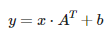

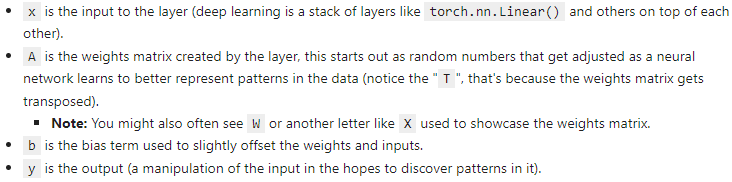

In [56]:
# уходим от рандомной инициализации весов
torch.manual_seed(42)

linear = torch.nn.Linear(in_features=2,
                         out_features=6)
x = tensor_A
output = linear(x)
p(f"Input shape: {x.shape}\n")
p(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


In [64]:
x = torch.arange(0, 100, 10)

p(x)
p(f"Minimum: {x.min()}")
p(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
p(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
p(f"Sum: {x.sum()}")

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


In [61]:
p(torch.max(x), torch.min(x), torch.mean(x.type(torch.float32)), torch.sum(x))

tensor(90) tensor(0) tensor(45.) tensor(450)


In [67]:
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of min and max values
print(f"Index where min value occurs: {tensor.argmin()}")
print(f"Index where max value occurs: {tensor.argmax()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where min value occurs: 0
Index where max value occurs: 8


In [68]:
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

In [71]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [70]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

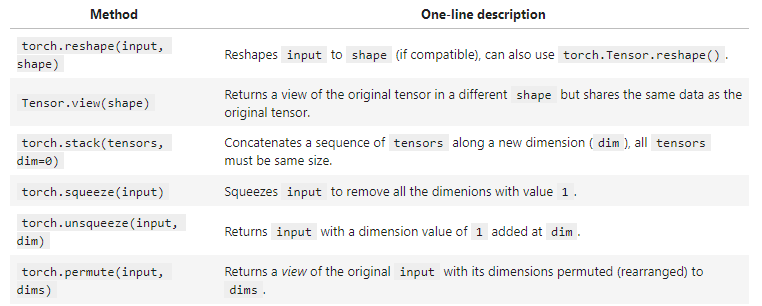

In [72]:
x = torch.arange(1., 8.)
p(x, x.shape)

tensor([1., 2., 3., 4., 5., 6., 7.]) torch.Size([7])


In [73]:
x_reshaped = x.reshape(1, 7)
p(x_reshaped, x_reshaped.shape)

tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])


In [74]:
z = x.view(1, 7)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]))

In [75]:
# Changing z changes x
z[:, 0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

In [79]:
x_stacked = torch.stack([x, x, x, x], dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

**torch.squeeze()**

In [80]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


**torch.unsqueeze()**

In [81]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


**Note:** Because permuting returns a view (shares the same data as the original), the values in the permuted tensor will be the same as the original tensor and if you change the values in the view, it will change the values of the original.

In [82]:
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


# Indexing

In [83]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [84]:
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [85]:
p(x[:, 0])
p(x[:, :, 1])
p(x[0, 0, :])

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([1, 2, 3])


# PyTorch tensors & NumPy

In [86]:
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

**Note:** By default, NumPy arrays are created with the datatype float64 and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above).

However, many PyTorch calculations default to using float32.

So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use tensor = torch.from_numpy(array).type(torch.float32).

In [87]:
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [88]:
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [89]:
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

# Reproducibility

In [92]:
# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [93]:
torch.cuda.is_available()

False

In [101]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [96]:
torch.cuda.device_count()

0

# Getting PyTorch to run on Apple Silicon

In [97]:
torch.backends.mps.is_available()

False

In [98]:
device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'cpu'

In [99]:
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

# Putting tensors (and models) on the GPU

In [102]:
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3])

# Moving tensors back to the CPU

**Note:** Putting a tensor on GPU using to(device) (e.g. some_tensor.to(device)) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:

some_tensor = some_tensor.to(device)

In [104]:
tensor_on_gpu.numpy() # Ошибка т.к тензор на GPU

array([1, 2, 3])

In [105]:
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])